In [46]:
import sys
import os.path as osp

from copy import deepcopy
import datetime
import os
import pickle
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from multihist import Hist1d, Histdd
from tqdm.notebook import tqdm
import pandas as pd
from scipy import stats

import strax
import straxen
strax.utils.tqdm = tqdm  # use notebook-aware progress bar

In [47]:
import peaks_utility as psu

In [48]:
st = straxen.contexts.xenonnt_online()

In [45]:
st

In [11]:
runs = st.select_runs(available=['peak_basics'])
runs

,name,number,mode,start,end,tags,livetime,tags.name,raw_records_available,peak_basics_available
1403,008561,8561,xenonnt_selftrigger_commissioning_lowe,2020-07-09 22:55:06.589,2020-07-09 23:55:07.413,,01:00:00.824000,NaN,False,True
1404,008562,8562,xenonnt_selftrigger_commissioning_lowe,2020-07-09 23:55:40.552,2020-07-10 00:55:43.335,,01:00:02.783000,NaN,False,True
1462,008620,8620,xenonnt_selftrigger_commissioning_highthresh,2020-07-14 00:19:30.404,2020-07-14 01:19:31.154,,01:00:00.750000,NaN,False,True
1463,008621,8621,xenonnt_selftrigger_commissioning_highthresh,2020-07-14 01:20:00.274,2020-07-14 02:20:01.005,,01:00:00.731000,NaN,False,True
1464,008622,8622,xenonnt_selftrigger_commissioning_highthresh,2020-07-14 02:20:30.124,2020-07-14 03:20:31.640,,01:00:01.516000,NaN,False,True
1492,008650,8650,xenonnt_selftrigger_commissioning_highthresh,2020-07-15 22:35:51.426,2020-07-15 23:35:53.275,,01:00:01.849000,NaN,False,True
1554,008712,8712,xenonnt_selftrigger_commissioning_highthresh,2020-07-18 19:42:05.167,2020-07-18 20:42:08.209,,01:00:03.042000,NaN,False,True
1556,008714,8714,xenonnt_selftrigger_commissioning_highthresh,2020-07-18 21:43:11.641,2020-07-18 22:43:13.797,,01:00:02.156000,NaN,False,True
1558,008716,8716,xenonnt_selftrigger_commissioning_highthresh,2020-07-18 23:44:11.041,2020-07-19 00:44:14.072,,01:00:03.031000,NaN,False,True
1560,008718,8718,xenonnt_selftrigger_commissioning_highthresh,2020-07-19 01:45:14.307,2020-07-19 02:45:16.373,,01:00:02.066000,NaN,False,True


In [26]:
def peakplots(run_name):
    #run_name = runs.iloc[runnumber]['name']
    #print('Run',run_name)
    peak_basics = st.get_array(run_name,'peak_basics',seconds_range=(0,30),
                              selection_str='n_channels>3')

    # risetime
    #plt.figure(1)
    #psu.plot_area_risetime(peak_basics,0,5,1,5)
    #plt.axvline(x=100, ymin=0.2, ymax=0.29, linestyle="-", color = 'r', label='S1/S2 strax boundary')
    #plt.axhline(y=150, xmin=0.4, xmax=1, linestyle="-", color = 'r')
    #plt.axhline(y=60, xmin=0, xmax=0.4, linestyle="-", color = 'r')
    #plt.legend()

    # width
    plt.figure(1)
    psu.plot_area_width(peak_basics,0,5,1,5)
    #psu.rectangle((50,5000),(80,200),'b')
    #ps1.rectangle((400,3500),(80,250),'blue')
    #plt.text(100, 100, 'S1', fontsize=18, color='b')
    #plt.text(10000, 3000, 'S2', fontsize=18, color='r')
    #plt.text(7, 300, 'single electrons', fontsize=12, color='r')

    #length
    #plt.figure(3)
    #phle = Histdd(peak_basics['area'], peak_basics['length']*peak_basics['dt'],
                        #bins=(np.logspace(0, 5, 200), np.logspace(1.7, 4.5, 150)))
    #plt.figure(figsize=(12,6))
    #phle.plot(log_scale=True, cblabel='events')
    #plt.xlabel("peak area (PE)", ha='right', x=1)
    #plt.ylabel("peak length (ns)", ha='right', y=1)
    #plt.xscale('log')
    #plt.yscale('log')
    
    # max pmt
    #plt.figure(2)
    #psu.plot_area_maxpmt(peak_basics,0,5,-0.5,2.3)
    
    # fraction top
    #plt.figure(3)
    #psu.plot_area_top(peak_basics,0,5,-2,0.1)
    
    # area
    plt.figure(2)
    plt.figure(figsize=(12,6))
    peak_s1 = peak_basics[(peak_basics['rise_time']<150)]
    psu.plot_area(peak_basics)
    psu.plot_area(peak_s1)
    #peak_cut = peak_s1[(peak_s1['max_pmt_area']/peak_s1['area']>0.04)]
    #ps1.plot_area(peak_cut)

<Figure size 432x288 with 0 Axes>

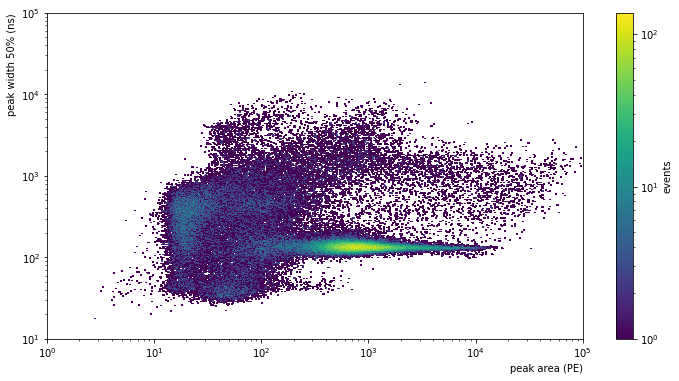

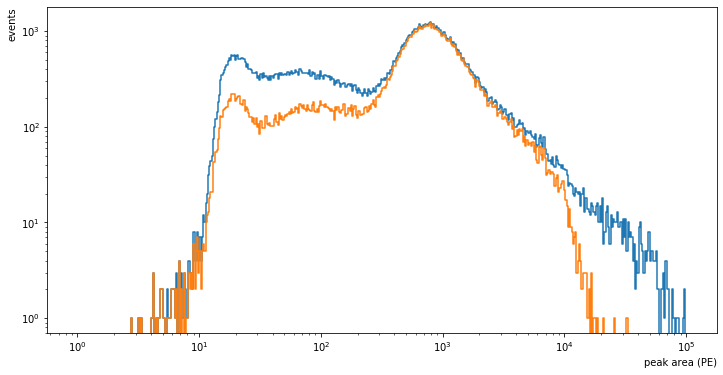

In [38]:
peakplots('008745')

<Figure size 432x288 with 0 Axes>

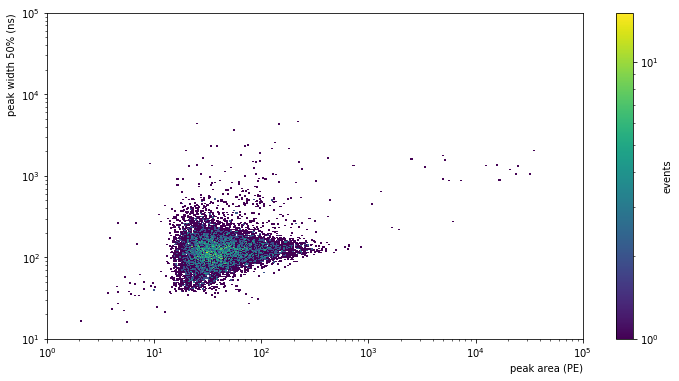

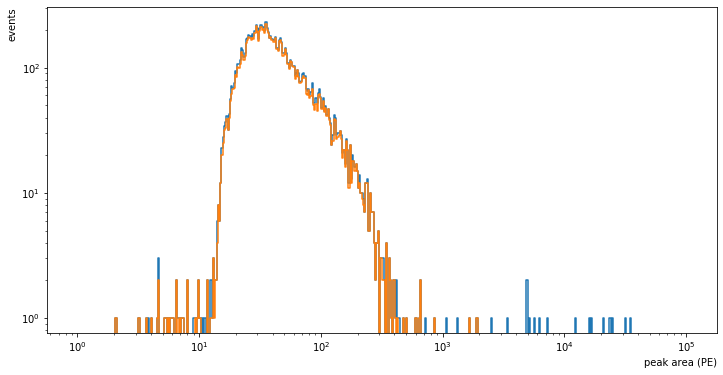

In [39]:
peakplots('008749')

Text(7, 300, 'single electrons')

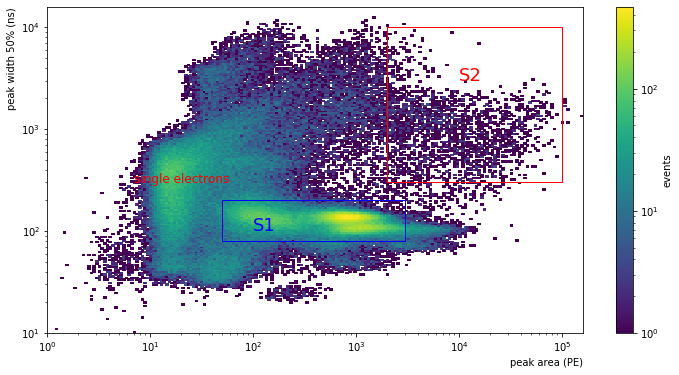

In [8]:
peak_basics = st.get_array('008614','peak_basics',seconds_range=(0,30),
                              selection_str='n_channels>3')
psu.plot_area_width(peak_basics,0,5.2,1,4.2)
plt.text(100, 100, 'S1', fontsize=18, color='b')
area_bounds1=(50,3000)
width_bounds1=(80,200)
area_bounds2=(2000,1e5)
width_bounds2=(300,1e4)
psu.rectangle(area_bounds1,width_bounds1,'b')
plt.text(10000, 3000, 'S2', fontsize=18, color='r')
psu.rectangle(area_bounds2,width_bounds2,'r')
plt.text(7, 300, 'single electrons', fontsize=12, color='r')

## Definition of parameter F90

S1 events in GXe are expected to be slower than LXe, we introduced the **discrimination parameterF90**, which is defined as the  peak area fraction in the first 90 ns. This parameter can help identifying different event populations, i.e. separate beta/gamma events from alpha events


In [49]:
peaks = st.get_array('008745',['peaks','peak_basics'],seconds_range=(0,10))

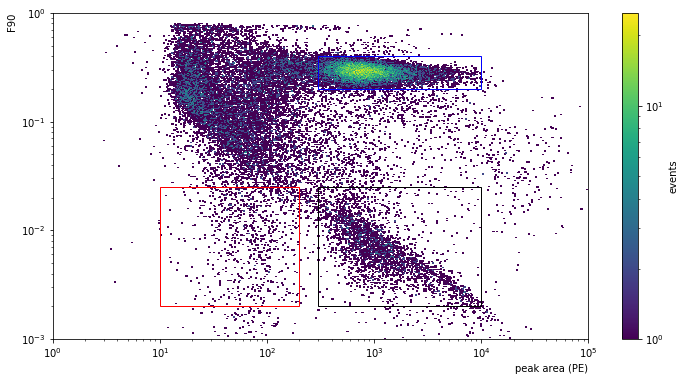

In [58]:
f90 = psu.f90(peaks,0,5,-3,0)
area_cut1 = (10,200)
area_cut2 = (300,1e4)
area_cut3 = (300,1e4)
f90_cut1 = (0.35,0.7)
f90_cut2 = (0.2,0.4)
f90_cut3 = (0.002,0.025)
psu.rectangle(area_cut1,f90_cut3,'r')
psu.rectangle(area_cut2,f90_cut2,'b')
psu.rectangle(area_cut3,f90_cut3,'k')

total number of records 38992


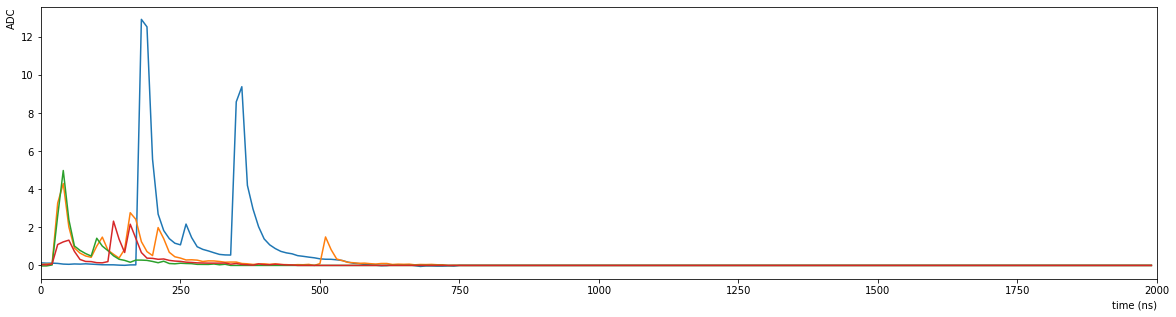

In [55]:
psu.plotwf(peaks,30,15,100,2000)

In [59]:
peaks_cut1 = peaks[(f90<f90_cut1[1]) & (f90>f90_cut1[0])
                   & (peaks['area']>area_cut1[0])]
peaks_cut2 = peaks[(f90<f90_cut2[1]) & (f90>f90_cut2[0])
                   & (peaks['area']>area_cut2[0])
                   & (peaks['area']<area_cut2[1])]
peaks_cut3 = peaks[(f90<f90_cut3[1]) & (f90>f90_cut3[0])
                   & (peaks['area']>area_cut3[0])
                   & (peaks['area']<area_cut3[1])]
peaks_cut4 = peaks[(f90<f90_cut3[1]) & (f90>f90_cut3[0])
                   & (peaks['area']>area_cut1[0])
                   & (peaks['area']<area_cut1[1])]

total number of records 824
total number of records 18107
total number of records 3034


<Figure size 432x288 with 0 Axes>

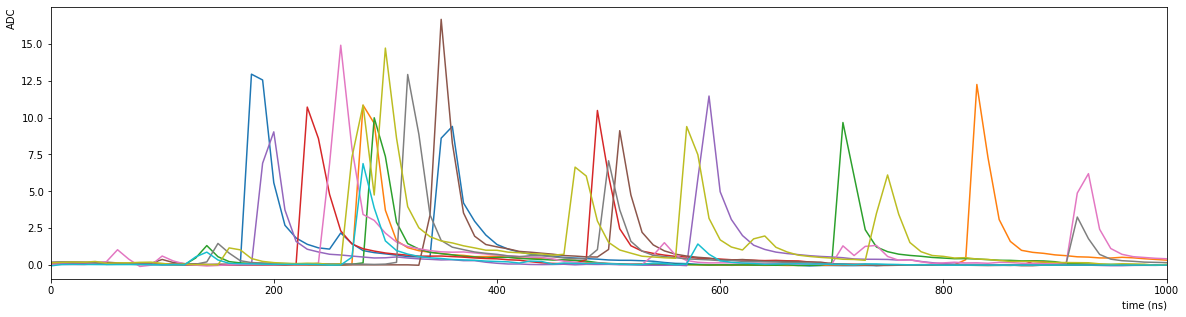

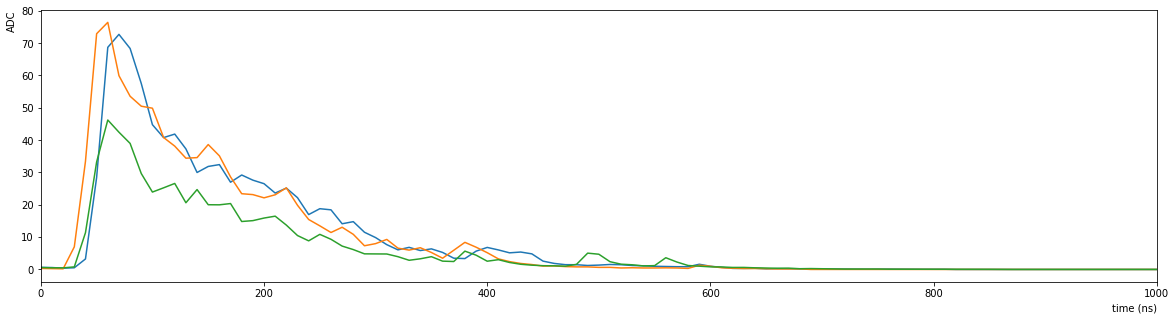

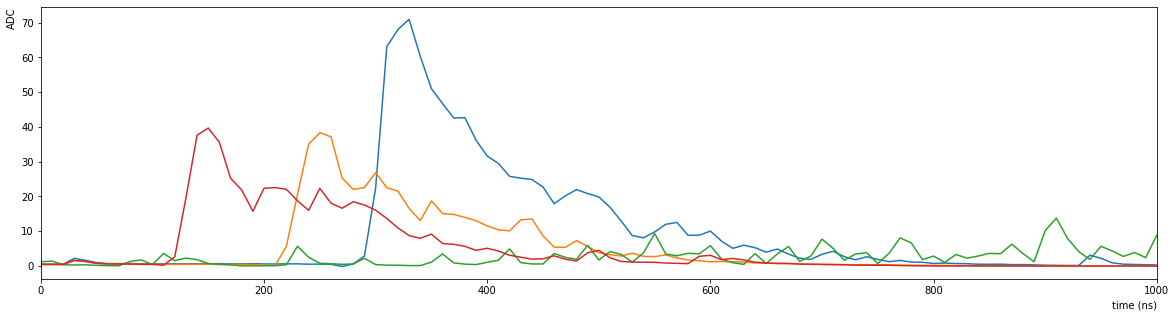

In [64]:
plt.figure(1)
psu.plotwf(peaks_cut4,10,1,1000,1000)
plt.figure(2)
psu.plotwf(peaks_cut2,10,1,1000,1000)
plt.figure(3)
psu.plotwf(peaks_cut3,10,1,1000,1000)

## Prevent S1 splits (from [Joran note](https://github.com/XENONnT/analysiscode/blob/master/Fast_Response_Analysis/S1_peaks/Prevent_S1_splits.ipynb))

Jorana ha implemetato la modifica su run 008637, i dettagli sono in [questa nota](https://xe1t-wiki.lngs.infn.it/doku.php?id=xenon:xenonnt:analysis:meetings:peak_splitting_gxe)

In [40]:
run_id = '008745'

In [41]:
peaks_before = st.get_array(run_id,['peaks'],seconds_range=(0,10))

In [42]:
peak_split_gof_threshold=(
    None,  # Reserved
    ((0.5, 1), (4, 0.4)), # These are the params changed
    ((2, 1), (4.5, 0.4)))
st2 = straxen.contexts.xenonnt_online()
st2.set_config(config=dict(peak_split_gof_threshold=peak_split_gof_threshold))

In [43]:
peaks_after = st2.get_array(run_id, ['peaks','peak_basics'], seconds_range=(0,10),
                                config=dict(peak_split_gof_threshold=peak_split_gof_threshold))

total number of records 38992
total number of records 38992


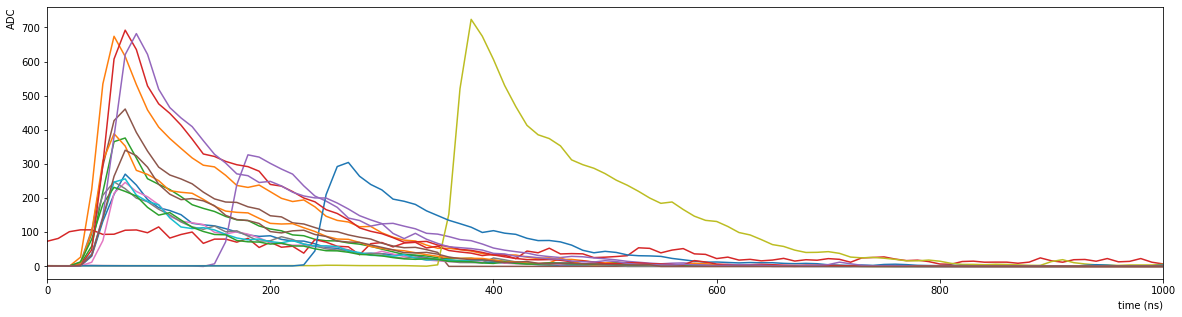

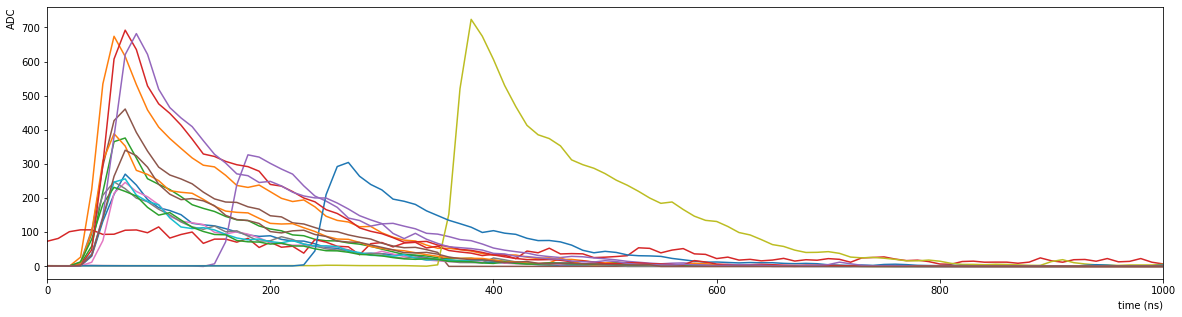

In [44]:
psu.plotwf(peaks_before,500,3000,10000,1000)
psu.plotwf(peaks_after,500,3000,10000,1000)

il problema dello splitting è stato risolto, i grafici qui sotto sono prodotti con il vecchio processamento

<Figure size 432x288 with 0 Axes>

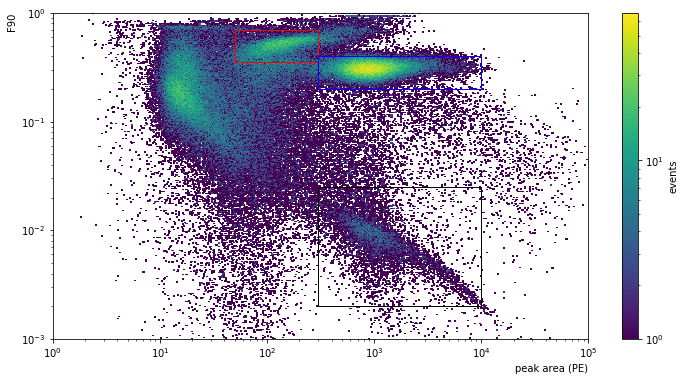

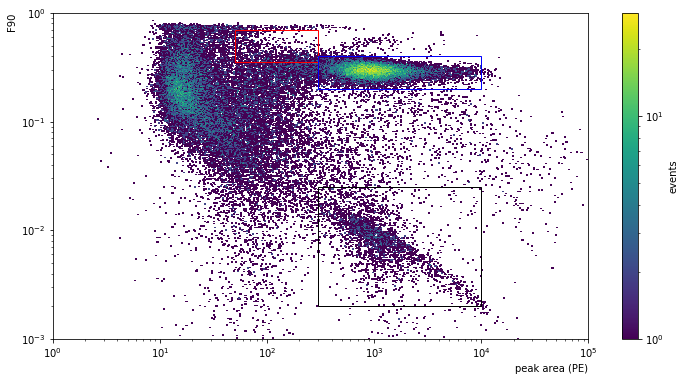

In [19]:
plt.figure(1)
f90_before = psu.f90(peaks_before,0,5,-3,0)
area_cut1 = (50,300)
area_cut2 = (300,1e4)
area_cut3 = (300,1e4)
f90_cut1 = (0.35,0.7)
f90_cut2 = (0.2,0.4)
f90_cut3 = (0.002,0.025)
psu.rectangle(area_cut1,f90_cut1,'r')
psu.rectangle(area_cut2,f90_cut2,'b')
psu.rectangle(area_cut3,f90_cut3,'k')
plt.figure(2)
f90_after = psu.f90(peaks_after,0,5,-3,0)
area_cut1 = (50,300)
area_cut2 = (300,1e4)
area_cut3 = (300,1e4)
f90_cut1 = (0.35,0.7)
f90_cut2 = (0.2,0.4)
f90_cut3 = (0.002,0.025)
psu.rectangle(area_cut1,f90_cut1,'r')
psu.rectangle(area_cut2,f90_cut2,'b')
psu.rectangle(area_cut3,f90_cut3,'k')

In [17]:
def select_data(st, run_id):
    
    area = []
    width = []
    rise_time = []
    max_pmt_area = []
    area_top = []
    waveforms = []
    r_data = pd.DataFrame(columns=['area','range_50p_area','rise_time',
                                   'max_pmt_area','area_fraction_top','dt','data'])
    
    for chunk in st.get_iter(run_id, ['peaks','peak_basics'], max_workers=20,
                         keep_columns = ('area', 'range_50p_area','rise_time',
                                         'max_pmt_area','area_fraction_top','dt','data') ):
        area = np.append(area,chunk.data['area'])
        width = np.append(width,chunk.data['range_50p_area'])
        rise_time = np.append(rise_time,chunk.data['rise_time'])
        max_pmt_area = np.append(max_pmt_area,chunk.data['max_pmt_area'])
        area_top = np.append(area_top,chunk.data['area_fraction_top'])
        waveforms = np.append(waveforms,chunk.data['data'])
        dt = chunk.data['dt']
    """"""
    r_data['area'] = area
    r_data['range_50p_area'] = width
    r_data['rise_time'] = rise_time
    r_data['max_pmt_area'] = max_pmt_area
    r_data['area_fraction_top'] = area_top
    r_data['dt'] = dt
    r_data['waveforms'] = waveforms
    """"""
    return r_data

In [ ]:
data_before = select_data(st,run_id)

In [10]:
data_after = select_data(st2,run_id)

<Figure size 432x288 with 0 Axes>

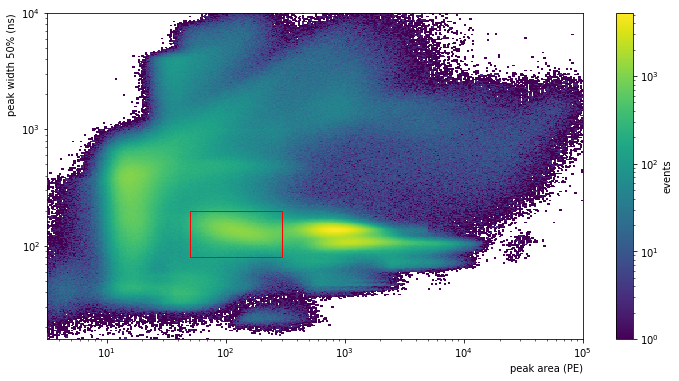

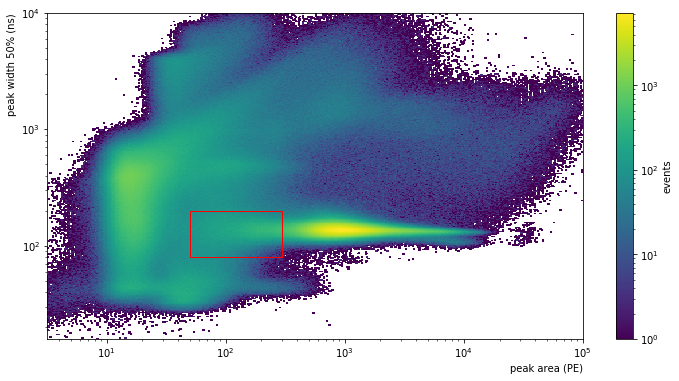

In [20]:
plt.figure(1)
psu.plot_area_width(data_before,0.5,5,1.2,4,400)
psu.rectangle(area_cut1,(80,200),'r')
plt.figure(2)
psu.plot_area_width(data_after,0.5,5,1.2,4,400)
psu.rectangle(area_cut1,(80,200),'r')

<Figure size 432x288 with 0 Axes>

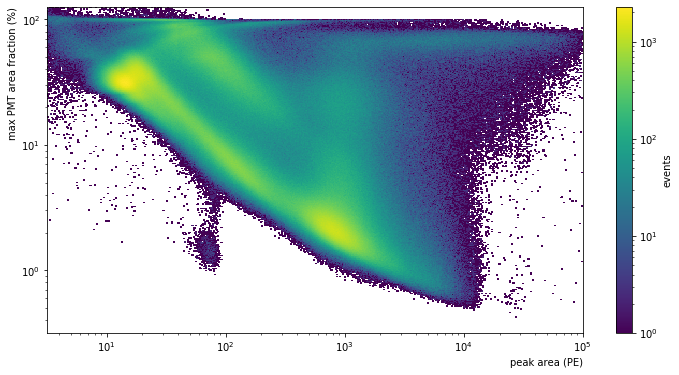

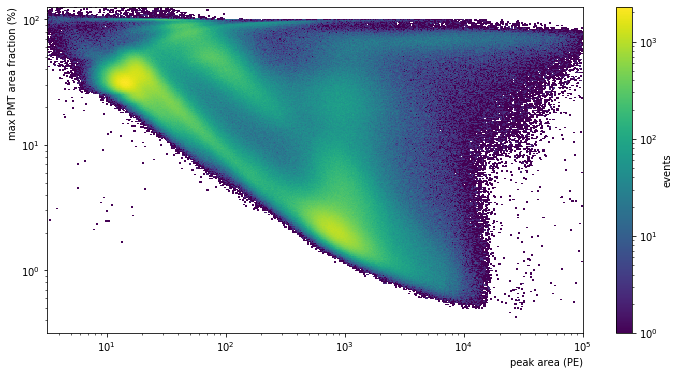

In [13]:
plt.figure(1)
psu.plot_area_maxpmt(data_before,0.5,5,-0.5,2.1)
plt.figure(2)
psu.plot_area_maxpmt(data_after,0.5,5,-0.5,2.1)

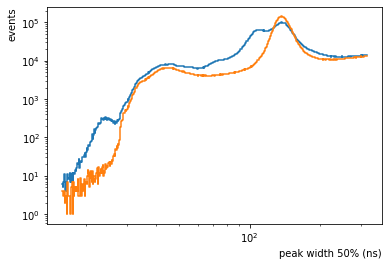

In [11]:
psu.plot_width(data_before,1.2,2.5)
psu.plot_width(data_after,1.2,2.5)

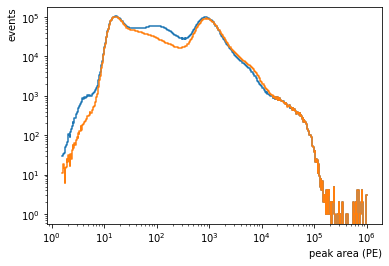

In [14]:
psu.plot_area(data_before,0.2,6)
psu.plot_area(data_after,0.2,6)

<Figure size 432x288 with 0 Axes>

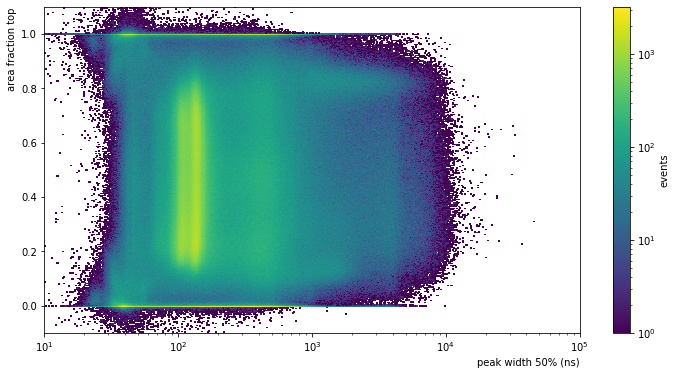

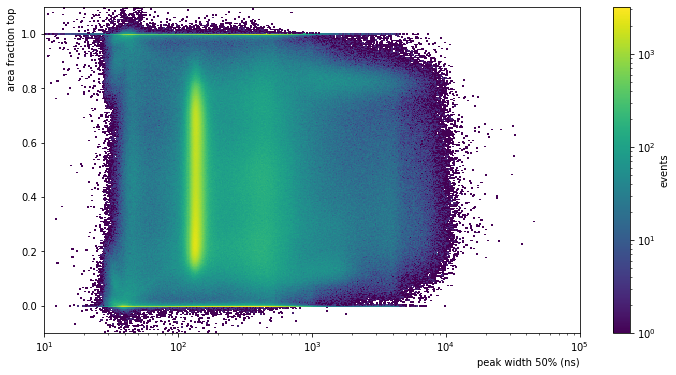

In [12]:
plt.figure(1)
psu.plot_width_top(data_before,1,4.5,-0.1,1.1)
plt.figure(2)
psu.plot_width_top(data_after,1,4.5,-0.1,1.1)